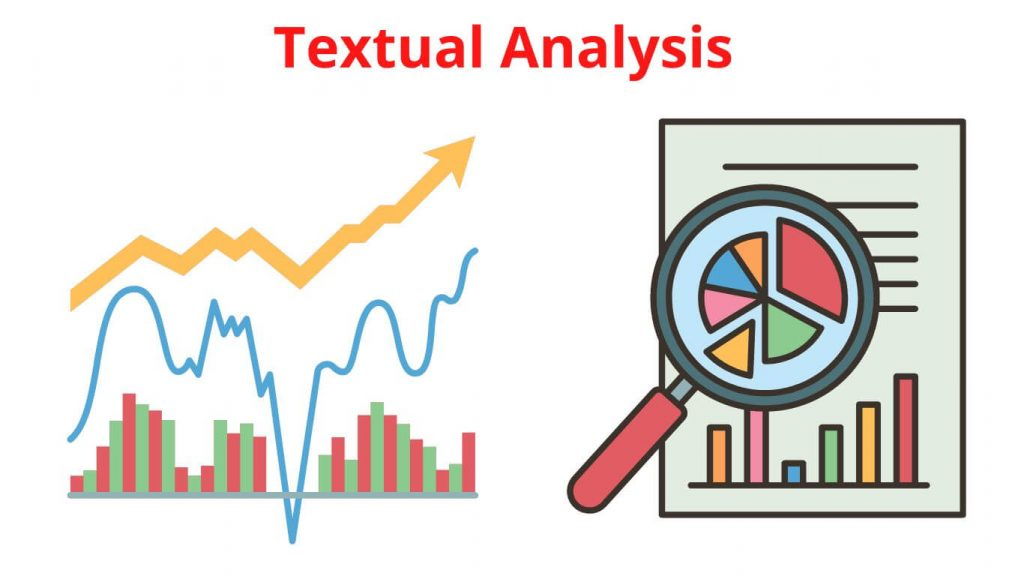

In this project, we're using a Python program to explore web pages and understand their content better. The program goes through a list of web page addresses from an Excel file and collects titles and text using a tool called BeautifulSoup. Then, it analyzes the text to find out how people feel about it, how complex it is, and how many words it has. Finally, it organizes all this information into a structured file, helping us learn more from the web.

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to C:\Users\SURAJ KUMAR
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SURAJ KUMAR
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_excel('input.xlsx')

In [3]:
data.head()

,URL_ID,URL
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...


In [4]:
data.shape

(100, 2)

In [5]:
data.isnull().sum()

URL_ID    0
URL       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
# Loop through each row in the data
for index, row in data.iterrows():
    # Extract URL and URL ID from the current row
    url = row['URL']
    url_id = row['URL_ID']
    
    # Set user agent header for the request
    header = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}
    
    try:
        # Send request to the URL
        response = requests.get(url, headers=header)
    except:
        # Print an error message if unable to get response
        print("Can't get response of {}".format(url_id))
        continue
    
    try:
        # Create BeautifulSoup object to parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
    except:
        # Print an error message if unable to parse HTML content
        print("Can't get page of {}".format(url_id))
        continue
    
    try:
        # Find title of the web page
        title = soup.find('h1').get_text()
    except:
        # Print an error message if unable to find title
        print("Can't get title of {}".format(url_id))
        continue
    
    # Initialize variable to store article text
    article = ""
    
    try:
        # Extract text content from <p> elements
        for p in soup.find_all('p'):
            article += p.get_text()
    except:
        # Print an error message if unable to extract text content
        print("Can't get text of {}".format(url_id))
    
    # Construct file name to save extracted data
    file_name = './TitleText/' + str(url_id) + '.txt'
    
    # Write title and text content to file
    with open(file_name, 'w', encoding='utf-8') as file:
        file.write(title + '\n' + article)

Can't get title of blackassign0036
Can't get title of blackassign0049


In [8]:
# Directories
text_dir = "./TitleText"
stopwords_dir = "./StopWords"
sentment_dir = "./MasterDictionary"

In [9]:
# load all stop wors from the stopwords directory and store in the set variable
stop_words = set()
for files in os.listdir(stopwords_dir):
    with open(os.path.join(stopwords_dir,files),'r',encoding='ISO-8859-1') as f:
         stop_words.update(set(f.read().splitlines()))

In [10]:
# load all text files  from the  directory and store in a list(docs)
docs = []
for text_file in os.listdir(text_dir):
    with open(os.path.join(text_dir,text_file),'r',encoding='utf-8') as f:
         text = f.read()

In [11]:
# store positive, Negative words from the directory
pos=set()
neg=set()

In [12]:
for files in os.listdir(sentment_dir):
    if files =='positive-words.txt':
        with open(os.path.join(sentment_dir,files),'r',encoding='ISO-8859-1') as f:
             pos.update(f.read().splitlines())
    else:
        with open(os.path.join(sentment_dir,files),'r',encoding='ISO-8859-1') as f:
             neg.update(f.read().splitlines())

In [13]:
# now collect the positive  and negative words from each file
# calculate the scores from the positive and negative words 
positive_words = []
Negative_words =[]
positive_score = []
negative_score = []
polarity_score = []
subjectivity_score = []

In [14]:
#iterate through the list of docs
for i in range(len(docs)):
    positive_words.append([word for word in docs[i] if word.lower() in pos])
    Negative_words.append([word for word in docs[i] if word.lower() in neg])
    positive_score.append(len(positive_words[i]))
    negative_score.append(len(Negative_words[i]))
    polarity_score.append((positive_score[i] - negative_score[i]) / ((positive_score[i] + negative_score[i]) + 0.000001))
    subjectivity_score.append((positive_score[i] + negative_score[i]) / ((len(docs[i])) + 0.000001))

In [15]:
avg_sentence_length = []
Percentage_of_Complex_words  =  []
Fog_Index = []
complex_word_count =  []
avg_syllable_word_count =[]

In [16]:
stopwords = set(stopwords.words('english'))

In [17]:
def measure(file):
    with open(os.path.join(text_dir, file),'r',encoding='utf-8') as f:
        text = f.read()
        # remove punctuations 
        text = re.sub(r'[^\w\s.]','',text)
        # split the given text file into sentences
        sentences = text.split('.')
        # total number of sentences in a file
        num_sentences = len(sentences)
        # total words in the file
        words = [word  for word in text.split() if word.lower() not in stopwords ]
        num_words = len(words)
 
        # complex words having syllable count is greater than 2
        # Complex words are words in the text that contain more than two syllables.
        complex_words = []
        for word in words:
            vowels = 'aeiou'
            syllable_count_word = sum( 1 for letter in word if letter.lower() in vowels)
            if syllable_count_word > 2:
                complex_words.append(word)

        # Syllable Count Per Word
        # We count the number of Syllables in each word of the text by counting the vowels present in each word.
        #We also handle some exceptions like words ending with "es","ed" by not counting them as a syllable.
        syllable_count = 0
        syllable_words =[]
        for word in words:
            if word.endswith('es'):
                word = word[:-2]
            elif word.endswith('ed'):
                word = word[:-2]
            vowels = 'aeiou'
            syllable_count_word = sum( 1 for letter in word if letter.lower() in vowels)
            if syllable_count_word >= 1:
                syllable_words.append(word)
                syllable_count += syllable_count_word


        avg_sentence_len = num_words / num_sentences
        avg_syllable_word_count = syllable_count / len(syllable_words)
        Percent_Complex_words  =  len(complex_words) / num_words
        Fog_Index = 0.4 * (avg_sentence_len + Percent_Complex_words)

        return avg_sentence_len, Percent_Complex_words, Fog_Index, len(complex_words),avg_syllable_word_count


In [18]:
# iterate through each file or doc
for file in os.listdir(text_dir):
    x,y,z,a,b = measure(file)
    avg_sentence_length.append(x)
    Percentage_of_Complex_words.append(y)
    Fog_Index.append(z)
    complex_word_count.append(a)
    avg_syllable_word_count.append(b)

-Word Count and Average Word Length Sum of the total number of characters in each word/Total number of words
-We count the total cleaned words present in the text by 
-Removing the stop words (using stopwords class of nltk package).
-Removing any punctuations like ? ! , . from the word before counting.

In [19]:
def cleaned_words(file):
    with open(os.path.join(text_dir,file), 'r',encoding='utf-8') as f:
        text = f.read()
        text = re.sub(r'[^\w\s]', '' , text)
        words = [word  for word in text.split() if word.lower() not in stopwords]
        length = sum(len(word) for word in words)
        average_word_length = length / len(words)
    return len(words),average_word_length

In [20]:
word_count = []
average_word_length = []
for file in os.listdir(text_dir):
    x, y = cleaned_words(file)
    word_count.append(x)
    average_word_length.append(y)

-To calculate Personal Pronouns mentioned in the text, we use regex to find 
-The counts of the words - “I,” “we,” “my,” “ours,” and “us”. Special care is taken
-so that the country name US is not included in the list.

In [21]:
def count_personal_pronouns(file):
    with open(os.path.join(text_dir,file), 'r',encoding='utf-8') as f:
        text = f.read()
        personal_pronouns = ["I", "we", "my", "ours", "us"]
        count = 0
        for pronoun in personal_pronouns:
            count += len(re.findall(r"\b" + pronoun + r"\b", text)) # \b is used to match word boundaries
        return count

In [22]:
pp_count = []
for file in os.listdir(text_dir):
    x = count_personal_pronouns(file)
    pp_count.append(x)

In [23]:
output_data = pd.read_excel('Output Data Structure.xlsx')

In [24]:
# URL_ID 44 ,57, 144 does not exists i,e. page does not exist, throughs 404 error
# so we are going to drop these rows from the table
output_data.drop([44-37,57-37,144-37], axis = 0, inplace=True)

In [25]:
# These are the required parameters 
variables = [positive_score,
            negative_score,
            polarity_score,
            subjectivity_score,
            avg_sentence_length,
            Percentage_of_Complex_words,
            Fog_Index,
            avg_sentence_length,
            complex_word_count,
            word_count,
            avg_syllable_word_count,
            pp_count,
            average_word_length]

In [26]:
# write the values to the dataframe
# Assuming variables is a list of iterables that you want to assign to the DataFrame columns starting from the third column
for i, var in enumerate(variables):
    if len(var) == len(output_data):
        output_data.iloc[:, i + 2] = var
    else:
        print(f"Length of var at index {i} does not match the length of the DataFrame.")


Length of var at index 0 does not match the length of the DataFrame.
Length of var at index 1 does not match the length of the DataFrame.
Length of var at index 2 does not match the length of the DataFrame.
Length of var at index 3 does not match the length of the DataFrame.
Length of var at index 4 does not match the length of the DataFrame.
Length of var at index 5 does not match the length of the DataFrame.
Length of var at index 6 does not match the length of the DataFrame.
Length of var at index 7 does not match the length of the DataFrame.
Length of var at index 8 does not match the length of the DataFrame.
Length of var at index 9 does not match the length of the DataFrame.
Length of var at index 10 does not match the length of the DataFrame.
Length of var at index 11 does not match the length of the DataFrame.
Length of var at index 12 does not match the length of the DataFrame.


In [27]:
#now save the dataframe to the disk
output_data.to_csv('Output_Data.csv')